In [2]:
import pandas as pd

df = pd.read_csv(
    "interpolated_dataset.csv", parse_dates=["time"], index_col="time"
)

df.describe()

,fossil fuels combined,windpower,windpower forecast,solarpower,solarpower forecast,other green energy,total load forecast,total load actual,price day ahead,price actual
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,10625.660735,5465.601358,5471.216689,1432.946854,1439.436302,4376.764987,28712.129962,28698.281385,49.874341,57.884023
std,3940.622130,3213.248199,3176.312853,1680.001212,1677.400880,2097.819892,4594.100854,4575.828854,14.618900,14.204083
min,2673.000000,234.000000,237.000000,2.000000,1.000000,1225.000000,18105.000000,18041.000000,2.060000,9.330000
25%,7402.000000,2933.750000,2979.000000,71.000000,70.000000,2676.000000,24793.750000,24807.000000,41.490000,49.347500
50%,10419.000000,4850.000000,4855.000000,616.000000,576.000000,3918.000000,28906.000000,28902.000000,50.520000,58.020000
75%,13297.000000,7401.000000,7353.000000,2579.000000,2636.000000,5692.250000,32263.250000,32194.250000,60.530000,68.010000
max,28085.000000,17436.000000,17430.000000,5792.000000,5836.000000,12259.000000,41390.000000,41015.000000,101.990000,116.800000


In [3]:
# Check for Missing Values
df.isnull().sum()

,0
fossil fuels combined,0
windpower,0
windpower forecast,0
solarpower,0
solarpower forecast,0
other green energy,0
total load forecast,0
total load actual,0
price day ahead,0
price actual,0


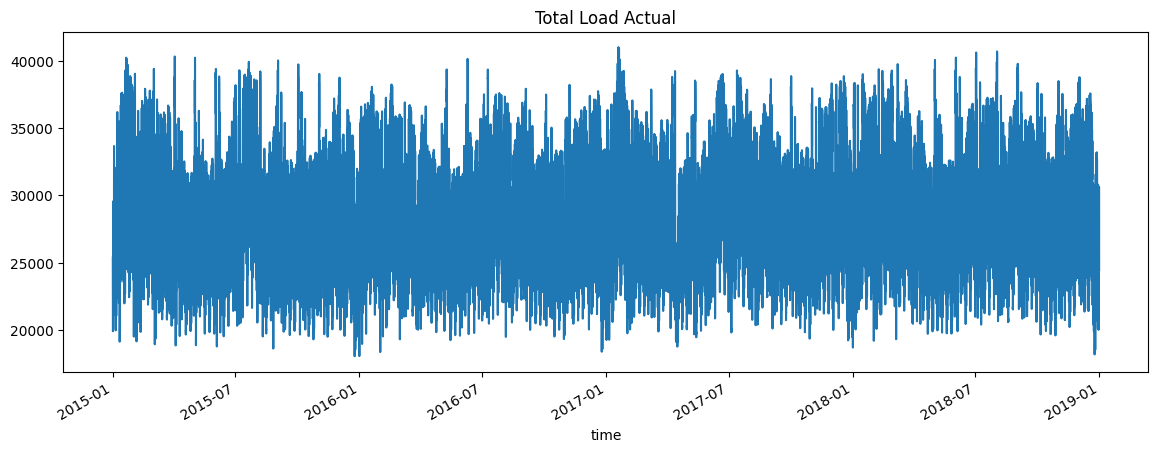

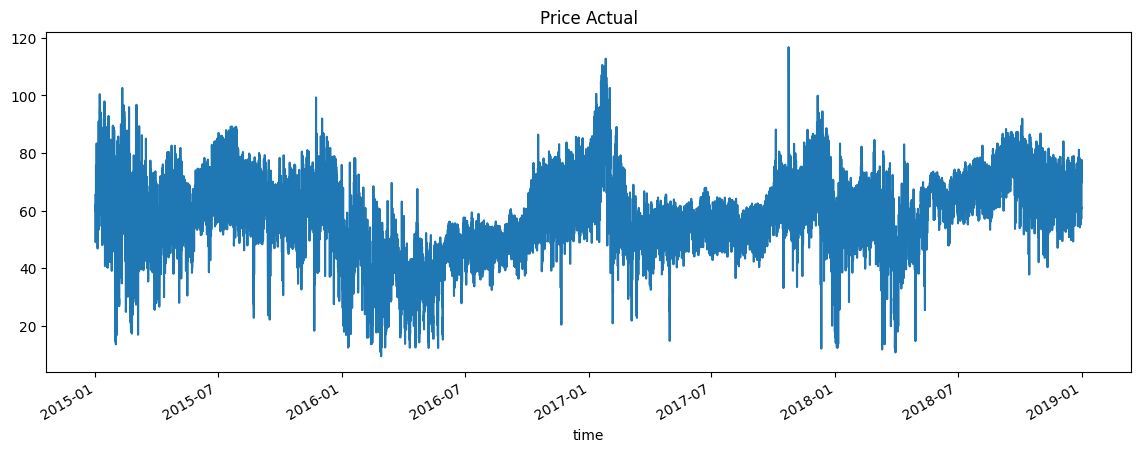

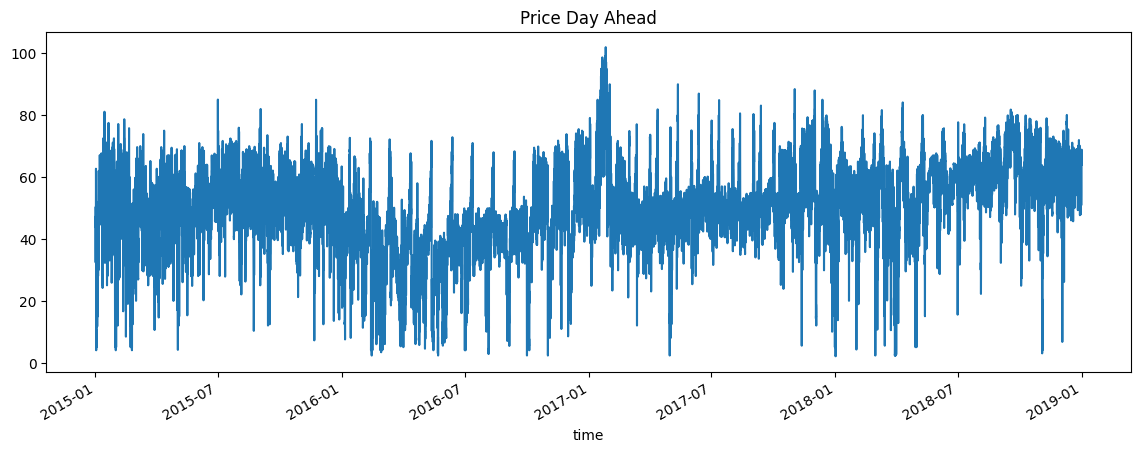

In [4]:
import matplotlib.pyplot as plt

df["total load actual"].plot(figsize=(14, 5), title="Total Load Actual")
plt.show()

df["price actual"].plot(figsize=(14, 5), title="Price Actual")
plt.show()

df["price day ahead"].plot(figsize=(14, 5), title="Price Day Ahead")
plt.show()

In [5]:
corr = df.corr()
print(corr["price actual"].sort_values(ascending=False))

price actual             1.000000
price day ahead          0.732155
fossil fuels combined    0.526191
total load forecast      0.435864
total load actual        0.435253
solarpower forecast      0.101401
solarpower               0.098574
other green energy       0.049450
windpower               -0.220366
windpower forecast      -0.221706
Name: price actual, dtype: float64


In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv(
    "interpolated_dataset.csv", parse_dates=["time"], index_col="time"
)

# Select the target variable (e.g., price actual)
y = df["price actual"].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y)

In [8]:
import numpy as np

def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

sequence_length = 24  # Use past 24 hours to predict next hour
X, y = create_sequences(y_scaled, sequence_length)

# Reshape data for LSTM (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [9]:
# Split data into train and test sets
split_index = int(0.8 * len(X))  # 80% train, 20% test
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))  # Output layer with 1 neuron (for regression)
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0237
Epoch 2/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.9918e-04
Epoch 3/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8.6570e-04
Epoch 4/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8.2694e-04
Epoch 5/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7.7357e-04
Epoch 6/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7.8754e-04
Epoch 7/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7.7217e-04
Epoch 8/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7.4727e-04
Epoch 9/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7.1394e-04
Epoch 10/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7.0916e-04


In [13]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predict on test set
y_pred = model.predict(X_test)

# Invert scaling for evaluation
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics
mae_lstm = mean_absolute_error(y_test_inv, y_pred_inv)
mse_lstm = mean_squared_error(y_test_inv, y_pred_inv)
rmse_lstm = np.sqrt(mse_lstm)

print(f"LSTM MAE: {mae_lstm:.2f}")
print(f"LSTM RMSE: {rmse_lstm:.2f}")

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
LSTM MAE: 1.59
LSTM RMSE: 2.25


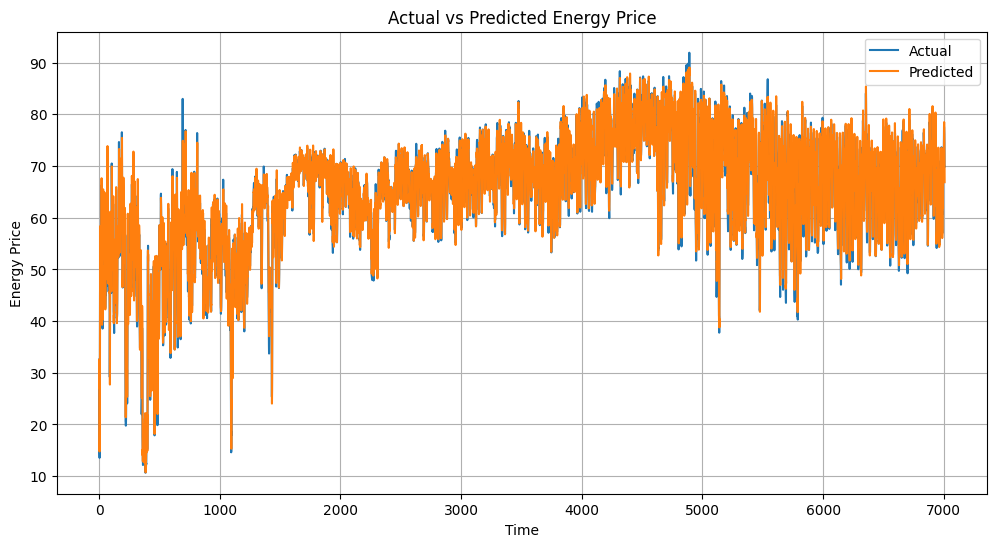

In [21]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('Actual vs Predicted Energy Price')
plt.xlabel('Time')
plt.ylabel('Energy Price')
plt.legend()
plt.grid(True)
plt.show()

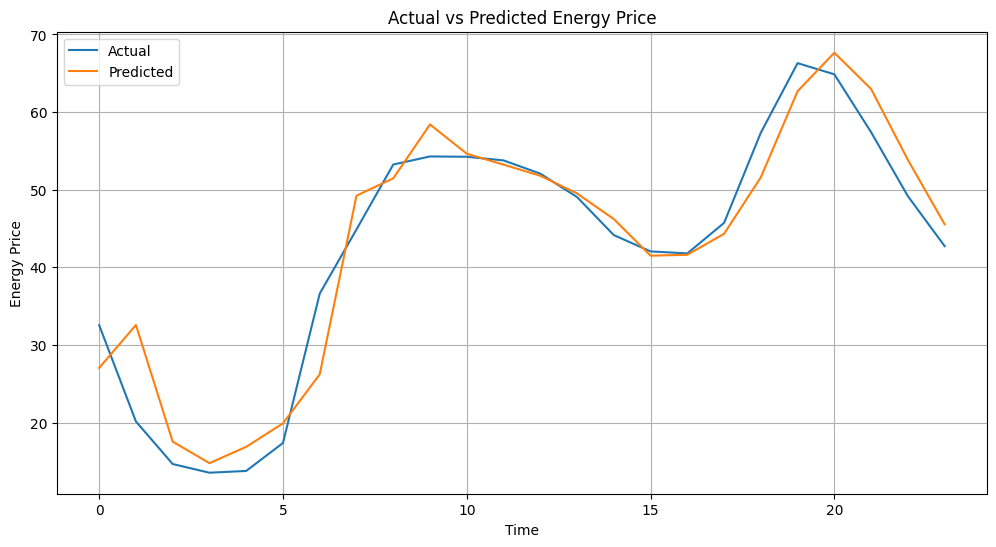

In [20]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv[:24], label='Actual')
plt.plot(y_pred_inv[:24], label='Predicted')
plt.title('Actual vs Predicted Energy Price')
plt.xlabel('Time')
plt.ylabel('Energy Price')
plt.legend()
plt.grid(True)
plt.show()

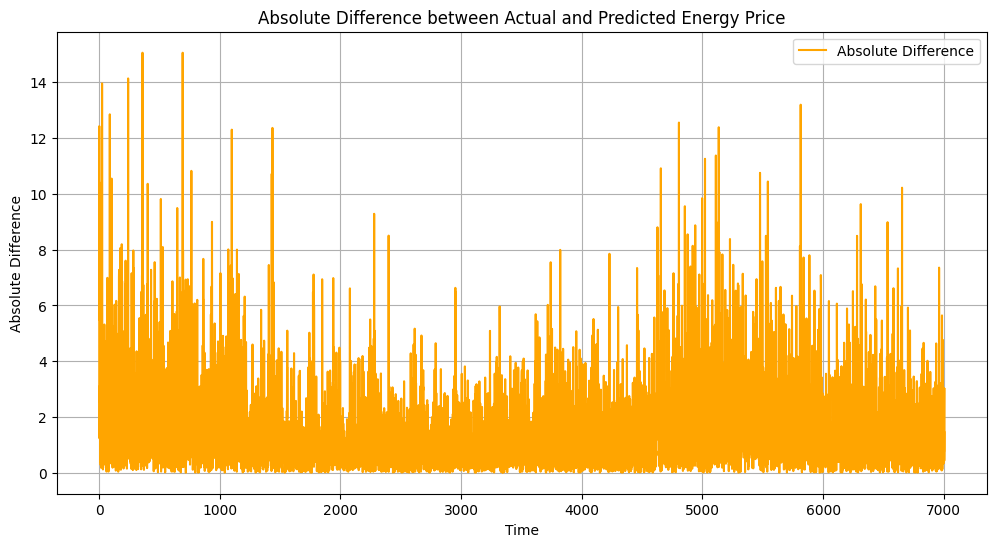

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate absolute difference
abs_diff = np.abs(y_test_inv - y_pred_inv)

# Plot absolute difference
plt.figure(figsize=(12, 6))
plt.plot(abs_diff, label='Absolute Difference', color='orange')
plt.title('Absolute Difference between Actual and Predicted Energy Generation')
plt.xlabel('Time')
plt.ylabel('Absolute Difference')
plt.legend()
plt.grid(True)
plt.show()